In [1]:
#data manipulation
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#sentiment analysis
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag
from collections import Counter
from nltk.tokenize import word_tokenize
from  nrclex import NRCLex


#set options & ignore warnings
pd.set_option('display.max_rows',7001)
pd.set_option('display.max_columns',7001)
pd.set_option('display.max_colwidth',7001)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('hotel_reviews.csv')
df.head()

,Index,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10),Review_Text
0,0,Hotel The Pearl,"Paharganj, New Delhi",Jul-23,Best budget friendly hotel,9.0,"Hotel the pearl is perfect place to stay in Delhi Paharganj. whole staff are very helpful, informative. Rooms are clean and comfortable. The hotel's location was very convenient, and we had a truly wonderful stay.. Most recommended.."
1,1,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Amazing place,9.0,Location of the hotel is perfect. The hotel is peaceful and nice. The staff is very kind and nice rooms. I recommend this hotel..
2,2,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Overall good stay. Economic.,9.0,"Location, Indian food."
3,3,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Lovely,9.0,"The location and the hotel itself is great. Next time I will stay here. Nice rooms with comfortable beds. good attitude of staff, they are helpful and explain you everything you ask them."
4,4,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Great hotel Great staff and great staying,9.0,"Friendly and smiling staffs.. The reception staff are so excellent and ready to help me any time, location is fantastic near all the attractions, room was big and comfortable.."


In [3]:
#general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              7001 non-null   int64  
 1   Name               7001 non-null   object 
 2   Area               7001 non-null   object 
 3   Review_Date        7001 non-null   object 
 4   Rating_attribute   7001 non-null   object 
 5   Rating(Out of 10)  7001 non-null   float64
 6   Review_Text        6996 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 383.0+ KB


In [4]:
#statistical inference
df.describe()

,Index,Rating(Out of 10)
count,7001.00000,7001.000000
mean,3500.00000,7.030981
std,2021.15895,2.882846
min,0.00000,1.000000
25%,1750.00000,6.000000
50%,3500.00000,8.000000
75%,5250.00000,9.000000
max,7000.00000,10.000000


In [5]:
#drop the index column
df.drop('Index', axis=1, inplace = True)

In [6]:
#duplicates?
df.duplicated().sum()

2315

In [7]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [8]:
#Missing Values
df.isna().sum()

Name                 0
Area                 0
Review_Date          0
Rating_attribute     0
Rating(Out of 10)    0
Review_Text          4
dtype: int64

Note: isna() couldn't detect some Missing values;  see below some possible reasons:
 - Non-Standard Missing Value Indicators: Missing values might be represented by non-standard indicators like 'NA', 'N/A', 'missing', or any other custom string, rather than np.nan
 - Whitespace or Empty Strings 
 - Trailing or Leading Spaces

In [9]:
#Missing values in review_text column, let's impute them
df['Review_Text'] = df['Review_Text'].str.strip()
df['Review_Text'] = df['Review_Text'].replace('#NAME?',np.nan)
df.dropna(inplace=True)

In [10]:
#let's now check the df after imputing the duplicates and the missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4677 entries, 0 to 6991
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               4677 non-null   object 
 1   Area               4677 non-null   object 
 2   Review_Date        4677 non-null   object 
 3   Rating_attribute   4677 non-null   object 
 4   Rating(Out of 10)  4677 non-null   float64
 5   Review_Text        4677 non-null   object 
dtypes: float64(1), object(5)
memory usage: 255.8+ KB


In [11]:
#function to display sentiment polarity
def sentiment_analysis(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity


In [12]:
#apply the function to the review_text column
df['Review_Text_Sentiment'] = df['Review_Text'].apply(sentiment_analysis)

In [13]:
#correlation coef between rating and sentiment
corr_coef = df['Rating(Out of 10)'].corr(df.Review_Text_Sentiment)
print(f'The Correlation Coefficient between The Rating and the Sentiment is:{corr_coef}')

The Correlation Coefficient between The Rating and the Sentiment is:0.4800901680262334


Text(0, 0.5, 'Sentiment Polarity')

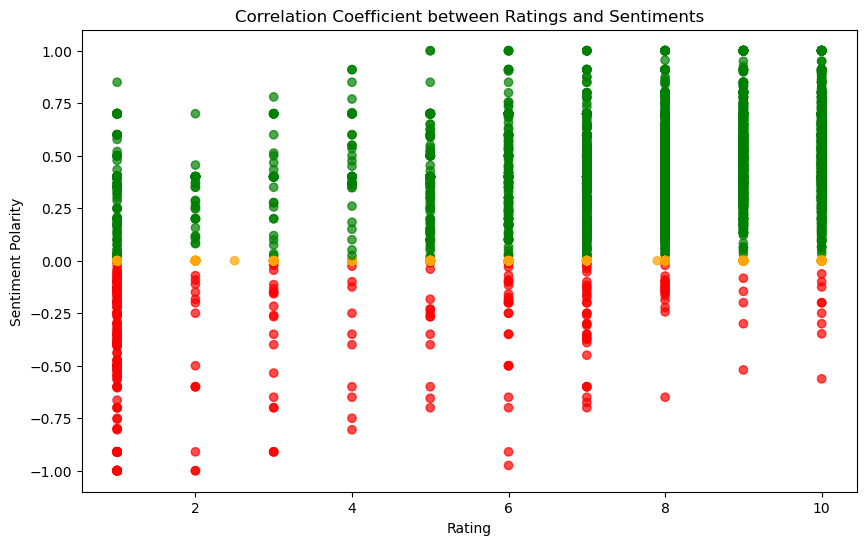

In [14]:
#let's plot the Sentiment
plt.figure(figsize=(10,6))
colors = df.Review_Text_Sentiment.apply(lambda x: 'red' if x < 0 else 'orange' if x == 0 else 'green' )
plt.scatter(df['Rating(Out of 10)'], df.Review_Text_Sentiment, c=colors, alpha=0.7)
plt.title('Correlation Coefficient between Ratings and Sentiments')
plt.xlabel('Rating')
plt.ylabel('Sentiment Polarity')

In [15]:
#let's categorize the Sentiment column
df['Review_Text_Sentiment'] = df['Review_Text_Sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Neutral' if x ==0 else 'Negative')

In [16]:
#let's categorize the Sentiment column
def analyze_sent(text):
    analyze = TextBlob(str(text))
    return 'Positive' if analyze.sentiment.polarity > 0 else 'Negative' if analyze.sentiment.polarity < 0 else 'Neutral'
df['Rating_Attribute_Sentiment'] = df['Rating_attribute'].apply(analyze_sent)

In [17]:
#nltk downloads
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [26]:
df.head()

,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10),Review_Text,Review_Text_Sentiment,Rating_Attribute_Sentiment,Review_Text_Emotions
0,Hotel The Pearl,"Paharganj, New Delhi",Jul-23,Best budget friendly hotel,9.0,"Hotel the pearl is perfect place to stay in Delhi Paharganj. whole staff are very helpful, informative. Rooms are clean and comfortable. The hotel's location was very convenient, and we had a truly wonderful stay.. Most recommended..",Positive,Positive,"[(fear, 0.0), (anger, 0.0), (anticip, 0.0), (trust, 26.666666666666668), (surprise, 6.666666666666667), (positive, 33.33333333333333), (negative, 0.0), (sadness, 0.0), (disgust, 0.0), (joy, 26.666666666666668), (anticipation, 6.666666666666667)]"
1,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Amazing place,9.0,Location of the hotel is perfect. The hotel is peaceful and nice. The staff is very kind and nice rooms. I recommend this hotel..,Positive,Positive,"[(fear, 0.0), (anger, 0.0), (anticip, 0.0), (trust, 28.57142857142857), (surprise, 7.142857142857142), (positive, 28.57142857142857), (negative, 0.0), (sadness, 0.0), (disgust, 0.0), (joy, 21.428571428571427), (anticipation, 14.285714285714285)]"
2,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Overall good stay. Economic.,9.0,"Location, Indian food.",Neutral,Positive,"[(fear, 0.0), (anger, 0.0), (anticip, 0.0), (trust, 33.33333333333333), (surprise, 0.0), (positive, 33.33333333333333), (negative, 0.0), (sadness, 0.0), (disgust, 0.0), (joy, 33.33333333333333)]"
3,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Lovely,9.0,"The location and the hotel itself is great. Next time I will stay here. Nice rooms with comfortable beds. good attitude of staff, they are helpful and explain you everything you ask them.",Positive,Positive,"[(fear, 0.0), (anger, 0.0), (anticip, 0.0), (trust, 27.27272727272727), (surprise, 9.090909090909092), (positive, 27.27272727272727), (negative, 0.0), (sadness, 0.0), (disgust, 0.0), (joy, 18.181818181818183), (anticipation, 18.181818181818183)]"
4,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Great hotel Great staff and great staying,9.0,"Friendly and smiling staffs.. The reception staff are so excellent and ready to help me any time, location is fantastic near all the attractions, room was big and comfortable..",Positive,Positive,"[(fear, 0.0), (anger, 0.0), (anticip, 0.0), (trust, 14.285714285714285), (surprise, 0.0), (positive, 28.57142857142857), (negative, 0.0), (sadness, 0.0), (disgust, 0.0), (joy, 28.57142857142857), (anticipation, 28.57142857142857)]"


In [18]:
#Let's create the positive reviews and negative reviews variables by joining the sentiment and the rating attribute
positive_reviews = ''.join(df[df["Rating_Attribute_Sentiment"]=='Positive']['Rating_attribute'])
negative_reviews = ''.join(df[df["Rating_Attribute_Sentiment"]=='Negative']['Rating_attribute'])

In [19]:
#Tokenitization
stopwords_set = set(stopwords.words('english'))
positive_tokens = [word.lower() for word in word_tokenize(positive_reviews) if word.isalpha() and word.lower() not in stopwords_set ]
negative_tokens = [word.lower() for word in word_tokenize(negative_reviews) if word.isalpha() and word.lower() not in stopwords_set ]

In [20]:
#5 most common words
top_positive_keywords = Counter(positive_tokens).most_common(5)
top_negative_keywords = Counter(negative_tokens).most_common(5)
print(f'Top 5 positive Keywords {top_positive_keywords}')
print(f'Top 5 negative Keywords {top_negative_keywords}')

Top 5 positive Keywords [('stay', 205), ('good', 190), ('goodvery', 133), ('hotel', 123), ('staff', 96)]
Top 5 negative Keywords [('bad', 27), ('experience', 26), ('hotel', 25), ('stay', 24), ('room', 16)]


In [21]:
print(f'Top 5 positive Keywords {top_positive_keywords}')
print(f'Top 5 negative Keywords {top_negative_keywords}')

Top 5 positive Keywords [('stay', 205), ('good', 190), ('goodvery', 133), ('hotel', 123), ('staff', 96)]
Top 5 negative Keywords [('bad', 27), ('experience', 26), ('hotel', 25), ('stay', 24), ('room', 16)]


In [22]:
#Emotions
df['Review_Text_Emotions'] = df['Review_Text'].apply(lambda text: [(emotion, score * 100) for emotion , score in NRCLex(text).affect_frequencies.items()])

In [27]:
#Top hotels with the most positive review
positive = df[df['Review_Text_Sentiment']=='Positive']
positive.groupby(['Name'])['Review_Text_Sentiment'].count().sort_values(ascending=False)

Name
Roomshala 028 Blu Lagoon - Opposite Select City Walk Mall                                                                                                                                                                                  10
Hotel Emerald Suites At Delhi Airport                                                                                                                                                                                                      10
Pamposh Guest House GK II Market                                                                                                                                                                                                           10
Park Plaza Shahdara                                                                                                                                                                                                                        10
Avatar Living @Safdarjung Enclave          

In [28]:
#Top hotels with the most negative review
negative = df[df['Review_Text_Sentiment']=='Negative']
negative.groupby(['Name'])['Review_Text_Sentiment'].count().sort_values(ascending=False)

Name
Hotel Asko international                                                                   5
Silver Palace Hotel                                                                        5
Hotel Chand Palace " Couple Friendly " Near New Delhi Railway Station                      4
Flagship Blissbourn                                                                        4
Airport Hotel Asian Blue Luxury                                                            4
Roomshala 099 Hotel Jyoti Deluxe - Karol Bagh                                              4
SPOT ON Hotel Silver Palace Dx                                                             4
OYO Hotel Raas Near M2k Cinemas Rohini                                                     3
OYO Hotel Sun Palace                                                                       3
Hotel Jai Deluxe- Paharganj New Delhi Railway Station                                      3
Flagship Chahal Guest House Near Nangloi Railway Station Metro St